In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

In [3]:
data = pd.read_csv('R02_rice_field.csv')

In [66]:
data.columns = data.columns.str.strip()
print(data.head())
print(data.isnull().sum())

   Production (X)  Harvest Area (Y) Kategori
0       1329536.0          323589.0   Sedang
1       1299699.0          329041.0   Sedang
2       1382905.0          339253.0   Sedang
3       1419128.0          348223.0   Sedang
4       1368074.0          337561.0   Sedang
Production (X)      0
Harvest Area (Y)    0
Kategori            0
dtype: int64


In [68]:
bins = [0, 300000, 600000, 900000, np.inf]  # Batasan kategori
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']  # Label kategori
data['Kategori'] = pd.cut(data['Harvest Area (Y)'], bins=bins, labels=labels)

In [70]:
X_class = data[['Production (X)']]
y_class = data['Kategori']

In [72]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [74]:
model_class = DecisionTreeClassifier(random_state=42)
model_class.fit(X_train_class, y_train_class)

DecisionTreeClassifier(random_state=42)

In [76]:
y_pred_class = model_class.predict(X_test_class)

In [78]:
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f'Akurasi Klasifikasi: {accuracy:.2f}')
print('Laporan Klasifikasi:\n', classification_report(y_test_class, y_pred_class))

Akurasi Klasifikasi: 0.93
Laporan Klasifikasi:
               precision    recall  f1-score   support

      Rendah       0.90      1.00      0.95        18
      Sedang       1.00      0.87      0.93        23
      Tinggi       0.80      1.00      0.89         4

    accuracy                           0.93        45
   macro avg       0.90      0.96      0.92        45
weighted avg       0.94      0.93      0.93        45



In [80]:
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print('Matriks Kebingungan:\n', conf_matrix)

Matriks Kebingungan:
 [[18  0  0]
 [ 2 20  1]
 [ 0  0  4]]


In [82]:
X_reg = data[['Production (X)']] 
y_reg = data['Harvest Area (Y)']  

In [84]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [86]:
model_reg = LinearRegression()
model_reg.fit(X_train_reg, y_train_reg)

LinearRegression()

In [88]:
y_pred_reg = model_reg.predict(X_test_reg)

In [90]:
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

In [92]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

Mean Squared Error: 5942443013.40
R² Score: 0.85


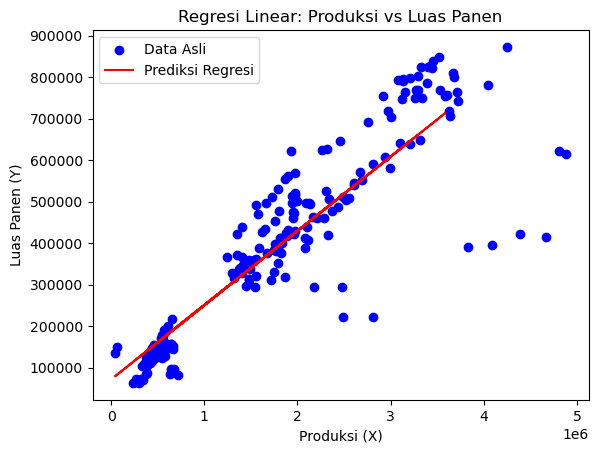

In [94]:
plt.scatter(X_reg, y_reg, color='blue', label='Data Asli')
plt.plot(X_test_reg, y_pred_reg, color='red', label='Prediksi Regresi')
plt.title('Regresi Linear: Produksi vs Luas Panen')
plt.xlabel('Produksi (X)')
plt.ylabel('Luas Panen (Y)')
plt.legend()
plt.show()